# <center> Portfolio Optimization with Monte Carlo Simulations

## The Efficient Frontier

The Efficient Frontier can be thought of as a representation of the set of optimal portfolios which offer the highest expected return for an investor's specified risk level. The Efficient frontier has become a staple of Modern Portfolio Theory since its introduction by Harry Markowtiz in 1952 and is graphically visualized by the compound annual growth rate of an investment portfolio representing the expected returns on the y-axis with the portfolio's risk level, also called the volatility represented by the portfolio's standard deviation, on the x-axis. 

Modern Portfolio Theory is a framework for assembling portfolios so the expected return is maximized for a given level of risk. 

The Efficient Frontier serves as a reminder that returns of a portfolio are determined by the overall weighting of its indvidual assets and when visualized the efficient frontier shows how diversification can improve an investor's risk to return ratio while showing there can be diminishing returns with respect to risk. The efficient frontier thus shows that there is an optimal portfolio for the investor based on their desired risk level to maximize their returns and serves to remind that higher degrees of risk do not necessarily indicate a higher return on the investment. 

Optimal portfolios tend to favor diversification while balancing an investors risk to return, and the Efficient Frontier shows that an individual asset's risk and return should not be evaluated alone but rather with how it contributes to the investor's overall portfolio return. 

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e1/Markowitz_frontier.jpg" width=400 height=400 />

Source: https://upload.wikimedia.org/wikipedia/commons/e/e1/Markowitz_frontier.jpg

# One Portfolio with Randomly assigned weights 

Before we proceed to do thousands of Monte Carlo simulations lets walk through a single run where the portfolio weights are randomly assigned to our three chosen assets for this analysis: Bitcoin, Ethereum, and SPY. The first bitcoin was transferred on January,12th 2009 with Hal Finney receiving ten bitcoins from Satoshi Nakamoto and was the original Cryptocurrency. The Ethereum network is the second cryptocurrency in market cap and did not go live until July, 30th 2015. We will only analyze the historical data for time periods after August,6th 2015 since Yahoo finance's historical data for Ethereum does not go back any further than this. 

SPY is an ETF the seeks to match the S&P 500 index, with the portfolio's holdings of common stocks in the S&P 500 index being weighted to represent the index as a whole. The goal is to match the performance of the S&P 500 index as a whole. 

These assets were chosen to see how the index fund approach towards investing combined with the two top cryptocurrency assets would perform as the whole of an individual investor's portfolio. 

### Obtaining the Historical Price Data

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr #collects data
import datetime as dt
np.random.seed(42)

#yf needed to override pdr remote error
import yfinance as yf
yf.pdr_override()

#specify start and end dates start 2015-08-06 : 2021-11-01 (YYYY-MM-DD)
start = dt.datetime(2015,8,6)
end = dt.datetime(2021,11,1)

#grab the data for each asset
eth = pdr.get_data_yahoo("ETH-USD", start, end)
bitcoin = pdr.get_data_yahoo("BTC-USD", start, end)
spy = pdr.get_data_yahoo("SPY", start, end)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Lets proceed to take a look at the format we recieved the data in from Yahoo finance below: 

In [2]:
bitcoin

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-06,281.906006,281.906006,278.403015,278.576996,278.576996,18792100
2015-08-07,278.740997,280.391998,276.365997,279.584991,279.584991,42484800
2015-08-08,279.742004,279.928009,260.709991,260.997009,260.997009,58533000
2015-08-09,261.115997,267.002991,260.467987,265.083008,265.083008,23789600
2015-08-10,265.477997,267.032013,262.596008,264.470001,264.470001,20979400
...,...,...,...,...,...,...
2021-10-28,58470.730469,62128.632812,58206.917969,60622.136719,60622.136719,45257083247
2021-10-29,60624.871094,62927.609375,60329.964844,62227.964844,62227.964844,36856881767
2021-10-30,62239.363281,62330.144531,60918.386719,61888.832031,61888.832031,32157938616


In [3]:
eth

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2021-10-28,3924.815430,4293.150879,3905.706055,4287.318848,4287.318848,25958154575
2021-10-29,4288.686523,4455.735352,4271.707520,4414.746582,4414.746582,22967641914
2021-10-30,4414.243652,4426.848633,4252.494141,4325.650391,4325.650391,14615490626


In [4]:
spy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-06,210.289993,210.419998,207.649994,208.350006,184.616196,116030800
2015-08-07,208.160004,208.339996,206.869995,207.949997,184.261780,117858000
2015-08-10,209.279999,210.669998,209.279999,210.570007,186.583298,80270700
2015-08-11,208.970001,209.470001,207.759995,208.669998,184.899719,126081400
2015-08-12,207.110001,209.139999,205.360001,208.919998,185.121262,172123700
...,...,...,...,...,...,...
2021-10-25,454.279999,455.899994,452.390015,455.549988,453.955139,45214500
2021-10-26,457.200012,458.489990,455.559998,455.959991,454.363708,56075100
2021-10-27,456.450012,457.160004,453.859985,453.940002,452.350800,72438000


We can already see an issue with comparing cryptocurrency assets with regular securities, cryptocurrencies are traded 24/7 all year long and regular securites are not. This seen in the two dataframes above, both cryptocurrencies have 2,276 rows of daily data for our time period from 2015-08-06 : 2021-11-01 whereas the SPY dataframe only has 1,571 rows worth of daily data. To simplify the analyses we are going to merge the three tables with an inner join on the dates shared so we only keep the dates that are common to each dataframe while only keeping the daily adjusted close column to perform analysis with, the others can be discarded. 

In [5]:
close = pd.merge(bitcoin['Adj Close'], eth['Adj Close'], on = 'Date', how = 'inner', suffixes=('_btc','_eth'))
close.head()

,Adj Close_btc,Adj Close_eth
Date,,
2017-11-09,7143.580078,320.884003
2017-11-10,6618.140137,299.252991
2017-11-11,6357.600098,314.681000
2017-11-12,5950.069824,307.907990
2017-11-13,6559.490234,316.716003


In [6]:
close_final = pd.merge(close, spy['Adj Close'],on = 'Date', how = 'inner', suffixes= ('original', '_spy'))
close_final.columns = ['BTC', 'ETH', 'SPY']
close_final

,BTC,ETH,SPY
Date,,,
2017-11-09,7143.580078,320.884003,239.654938
2017-11-10,6618.140137,299.252991,239.580688
2017-11-13,6559.490234,316.716003,239.803452
2017-11-14,6635.750000,337.631012,239.246506
2017-11-15,7315.540039,333.356995,238.048996
...,...,...,...
2021-10-25,63039.824219,4217.876953,453.955139
2021-10-26,60363.792969,4131.102051,454.363708
2021-10-27,58482.386719,3930.257324,452.350800


We lost a few more days worth of data than we expected originally, we assumed it would 1,571 days worth of data matching all of Yahoo's data on SPY, but it seems Yahoo finance is missing a few days worth of data for Ethereum over this time period as well. These days have been dropped from all three dataframes and we are left with a single close_final dataframe containing the adjusted close prices of the respective assets: BTC, ETH, and SPY.

### Calculating the Log Returns

Continuously compounded arithmetic returns are not symmetrical and is one of the reasons log returns are preferred when looking at expected annual returns in calculating the Sharpe Ratio below; Log returns are also time additive which is useful in further analysis. 

The arithmetic return can be defined as:

$r_a = \frac{FV}{PV}-1$  
where FV is the Future Value and PV is the Present Value

We can then express the log returns as: 

$r_{log} = ln(\frac{FV}{PV})$ or via some manipulation $r_{log} = ln(r_a +1)$

In [7]:
#ln( percentage change between previous row)
log_returns = np.log(1+close_final.pct_change())
log_returns

,BTC,ETH,SPY
Date,,,
2017-11-09,NaN,NaN,NaN
2017-11-10,-0.076400,-0.069790,-0.000310
2017-11-13,-0.008901,0.056716,0.000929
2017-11-14,0.011559,0.063948,-0.002325
2017-11-15,0.097529,-0.012740,-0.005018
...,...,...,...
2021-10-25,0.037950,0.060520,0.005348
2021-10-26,-0.043377,-0.020788,0.000900
2021-10-27,-0.031664,-0.049839,-0.004440


The log_returns will be used to calculate the Return of our portfolio below when calculating the Sharpe Ratio. 

### Calculating the Sharpe Ratio

The sharpe ratio helps to clarify the return of an investment compared to its risk by taking the average return earned in excess of the risk-free rate over the volatility or total risk of the portfolio. 

A high sharpe ratio is sought after when comparing portfolios with similar assets, the larger the sharpe ratio the better its risk adjusted return and this can help explain whether a portfolio's excess returns are a result of excessive risk. 

The Sharpe Ratio is defined as:

$Sharpe Ratio = \frac{R_p -R_f}{\sigma_p}$   

where:

$R_p=$ the return of the portfolio

$R_f=$ risk-free rate

$\sigma_p=$ standard deviation of the portfio's excess return


The expected returns can be found by taking: 

$R_p = (w_1r_1)+(w_2r_2)+...(w_nr_n)$ 

with $r_i=$ being the return of Security i and $w_i=$ Weight of Security i

The standard deviation of the portfolio can be found with:

$\sigma_p = \sqrt{ ({w_i}^2{\sigma_i}^2)+({w_j}^2{\sigma_j}^2)+(2w_jw_ip_{i,j}\sigma_i\sigma_j)}$

where : 

$\sigma_i =$ Standard deviation of the asset i 

$w_i =$ weight of asset i

$p_{i,j} = $ Correlation Coefficient between the returns of asset i and asset j

#### $R_p :$ Return of the Portfolio

In [8]:
#generate a random sample of weights for portfolios
tickers = ['BTC-USD', 'ETH-USD','SPY']

#generates rand sample weight btw 0 and 1
weights = np.random.random_sample(len(tickers))

#rebalance so the sum of the weights is ~ 1
weights_balanced = weights / np.sum(weights)

#Store Weights For Dataframe of Portfolio results
final_weights = []
final_weights.append(np.round(weights_balanced,3))

#Calculate the annualized(252 days by convention) expected returns
#average daily return for each asset * asset weight in portfolio * 252 days for the annualized returns
exp_returns= np.sum( (log_returns.mean() * weights_balanced) * 252)


In [9]:
exp_returns

0.4630803301248744

In [29]:
#exp returns
np.dot(log_returns.mean(), weights_balanced)*252

0.46308033012487443

We have now found $R_p$, the return of the overall portfolio and stored this in the exp_returns variable.

#### $\sigma_p:$ Standard Deviation of the portfolio

Shown below is an example of how we may find the Variance of the portfolio with the formula seen above via matrix multiplication. Below the example was done with only two assets, here we used Bitcoin and Ethereum, this can be expanded upon for additional assets. 

First we will find the Covariance Matrix of the two assets Bitcoin and Ethereum, defined as $ \Sigma_{B,E}$

$ \Large \Sigma_{B,E} = \begin{bmatrix} Var(B) & \sigma_{B,E} \\ \sigma_{E,B} & Var(E) \end{bmatrix}$

Then we proceed to multiply the Covariance Matrix of the two assets with Random Weights that have been assigned to each asset for the given portfolio.

$ \begin{bmatrix} Var(B) & \sigma_{B,E} \\ \sigma_{E,B} & Var(E) \end{bmatrix} * \begin{bmatrix} W_b \\ W_e \end{bmatrix} = \begin{bmatrix}W_b Var(B) + W_e\sigma_{B,E} \\ W_e Var(E)+ W_b\sigma_{E,B} \end{bmatrix}$

Then procced to multiply the transpose of weights vector with the resultant matrix seen above to get the Variance of the portfolio with randomly assigned weights: 

$ \begin{bmatrix} W_b && W_e \end{bmatrix}  * \begin{bmatrix}W_b Var(B) + W_e\sigma_{B,E} \\ W_e Var(E)+ W_b\sigma_{E,B} \end{bmatrix}   =  {W_b}^2Var(B) + {W_e}^2Var(E) + 2W_bW_e\sigma_{E,B}$


Recall that $Cov_{B,E}$ can also be expressed as $\rho_{b,e}\sigma_b\sigma_e$ where $\rho_{B,E}$ is the correlation coefficient between the two assets Bitcoin and Ethereum. 

Therefore we now have expressed the variance of the portfolio with matrix multiplication and it now resembles the above formula we expected to see. 

$ Var_p = {W_b}^2Var(B) + {W_e}^2Var(E) + 2W_bW_e\rho_{b,e}\sigma_b\sigma_e$

We can then proceed to take the square root of the $Var_p$ to get the $\sigma_p$ : 

$ \sigma_p = \sqrt{{W_b}^2Var(B) + {W_e}^2Var(E) + 2W_bW_e\rho_{b,e}\sigma_b\sigma_e }$ seen in the above equation defining the Sharpe Ratio

In [11]:
#calculate the Expected Volatility. 
covariance_mat = log_returns.cov() * 252

portfolio_var = np.dot(weights_balanced.T, np.dot(covariance_mat, weights_balanced) ) 

#volatility 
portfolio_std = np.sqrt(portfolio_var)

We have now found the standard deviation or volatility of the portfolio and stored it in the portfolio_std variable.

In [12]:
portfolio_std

0.6109606182302743

#### Sharpe Ratio

$Sharpe Ratio = \frac{R_p -R_f}{\sigma_p}$   

Here the risk free rate has been set to the 3 month Treasury Bill Rate as of November of 2021 at 0.05%

In [13]:
#Risk Free Rate changes w.r.t to time and can be adjusted
risk_free_rate = 0.05

#Sharpe Ratio
sharpe_ratio = (exp_returns - risk_free_rate) / portfolio_std
sharpe_ratio

0.6761161322008192

In [14]:
data = {'Expected Portfolio Returns' : exp_returns,
        'Portfolio Standard Deviation' : portfolio_std, 
        'Portfolio Sharpe Ratio': sharpe_ratio,
       'Weight': final_weights}

pf_metrics = pd.DataFrame(data)
pf_metrics

,Expected Portfolio Returns,Portfolio Standard Deviation,Portfolio Sharpe Ratio,Weight
0,0.46308,0.610961,0.676116,"[0.182, 0.462, 0.356]"


In [15]:
print('For our single run where we randomly allocated weights to each of the assets we obtained an Expected Portfolio Return of: ' + str(exp_returns) +  ' with a Sharpe Ratio of: ' +str(sharpe_ratio) + ' when BTC, ETH and SPY were weighted as: ' + str(final_weights) + ' respectively.' )  

For our single run where we randomly allocated weights to each of the assets we obtained an Expected Portfolio Return of: 0.4630803301248744 with a Sharpe Ratio of: 0.6761161322008192 when BTC, ETH and SPY were weighted as: [array([0.182, 0.462, 0.356])] respectively.


# Monte Carlo Simulation to Optimize Portfolio

Now that we have found the sharpe ratio for one randomly weighted portfolio, lets repeat this experiment through thousands of randomly assigned weights with a Monte Carlo Simulation.  Monte Carlo methods use random sampling to obtain a numerical result that cannot easily be predicted due to the unknown interactions of random variables in the system under study.  Here we are going to run a basic Monte Carlo simulation with 10,000 runs, where in each run a new randomly sampled asset weight will be assigned as we iterate throughout the experiment. 

From there everything is just as we did above to calculate a single sharpe ratio with randomly assigned weights, excpet done 5000 times. By assigning 5000 randomly sampled weights to Bitcoin, Ethereum and SPY we are going to be able to discern what is the optimally balanced portfolio to maximize our Sharpe Ratio. 

In [24]:
#Number of simulations to run 
simulations = 10000


#Store the Expected Returns
expected_returns = np.zeros(simulations)

#Volatility i.e portfolio standard deviation
volatility = np.zeros(simulations) 

#Sharpe Ratio
sharpe_ratio_final = np.zeros(simulations)

#Portfolio Weights BTC,ETH, SPY create a simulations x 3 array to store weights
portfolio_weights = np.zeros((simulations, len(tickers) ))


#Begin the Simulations

for portfolio in range(simulations):
    #Generate the randomly assigned portfolio weights
    weights_sim = np.random.random_sample(len(tickers))
    #rebalance so the sum of the weights is ~1
    weights_balanced_sim = weights_sim / np.sum(weights_sim)
    
    #add the weights to the portfolio_weights array row iterated on
    portfolio_weights[portfolio, :] = np.round(weights_balanced_sim,3)
    
    #Calculate the annualized returns
    log_returns_final = np.log(1+close_final.pct_change()) 
    exp_returns_final = np.sum( (log_returns_final.mean() * weights_balanced_sim) * 252)
    
    #store the exp_returns_final
    expected_returns[portfolio] = exp_returns_final
    
    #calculate the volatility
    covariance_mat_final = log_returns_final.cov() * 252
    portfolio_var_final = np.dot(weights_balanced_sim.T, np.dot(covariance_mat_final, weights_balanced_sim) ) 
    #volatility 
    portfolio_std_final = np.sqrt(portfolio_var_final)
    
    volatility[portfolio] = portfolio_std_final
    
    #Sharpe Ratio
    risk_free_rate_final = 0.05
    sharpe_ratio_sim = (exp_returns_final - risk_free_rate_final) / portfolio_std_final
    
    sharpe_ratio_final[portfolio] = sharpe_ratio_sim




In [25]:
#Create a DataFrame to store the results 

simulations_data = [expected_returns, volatility, sharpe_ratio_final, portfolio_weights]

sim_df = pd.DataFrame(simulations_data).T

sim_df.columns = ['Returns', 'Volatility', 'Sharpe Ratio', 'BTC-ETH-SPY Weights']

sim_df


,Returns,Volatility,Sharpe Ratio,BTC-ETH-SPY Weights
0,0.423592,0.529652,0.799756,"[0.443, 0.182, 0.375]"
1,0.567783,0.78957,0.719103,"[0.362, 0.534, 0.104]"
2,0.452956,0.582226,0.777973,"[0.294, 0.356, 0.35]"
3,0.454162,0.604312,0.751536,"[0.704, 0.043, 0.253]"
4,0.470402,0.609392,0.77192,"[0.435, 0.283, 0.283]"
...,...,...,...,...
9995,0.389899,0.471652,0.826666,"[0.278, 0.242, 0.481]"
9996,0.428306,0.567368,0.754899,"[0.043, 0.499, 0.458]"
9997,0.445171,0.566009,0.786509,"[0.446, 0.223, 0.331]"
9998,0.588026,0.820841,0.71637,"[0.481, 0.483, 0.036]"


Now that we have run the simulation 10,000 times and stored the data from each run as an individual row in the sim_df we can proceed to analyze the sim_df to determine the portfolio's assigned asset weight for our max Sharpe Ratio, minimum volatilty, and highest return runs. 

In [26]:
#Return the max sharpe ratio from simulations
highest_sharpe = sim_df.loc[sim_df['Sharpe Ratio'].astype(float).idxmax()]

#Return the minimum volatility from the simulations
min_vol = sim_df.loc[sim_df['Volatility'].astype(float).idxmin()]

#Highest Return
highest_return = sim_df.loc[sim_df['Returns'].astype(float).idxmax()]


print('')
print('The portfolio with the highest sharpe ratio is: ')
print('')
print(highest_sharpe)
print('=' *50 )

print('')
print('The portfolio with the the minimum amount of volatility is: ')
print('')
print(min_vol)
print('=' *50 )

print('')
print('The portfolio with the the highest return is: ')
print('')
print(highest_return)



The portfolio with the highest sharpe ratio is: 

Returns                             0.241075
Volatility                          0.252688
Sharpe Ratio                         0.95404
BTC-ETH-SPY Weights    [0.154, 0.038, 0.808]
Name: 1094, dtype: object

The portfolio with the the minimum amount of volatility is: 

Returns                              0.16533
Volatility                          0.208283
Sharpe Ratio                        0.793777
BTC-ETH-SPY Weights    [0.002, 0.003, 0.995]
Name: 7633, dtype: object

The portfolio with the the highest return is: 

Returns                              0.65153
Volatility                          0.990493
Sharpe Ratio                        0.657783
BTC-ETH-SPY Weights    [0.064, 0.932, 0.005]
Name: 6379, dtype: object


# Visualization of the Efficient Frontier

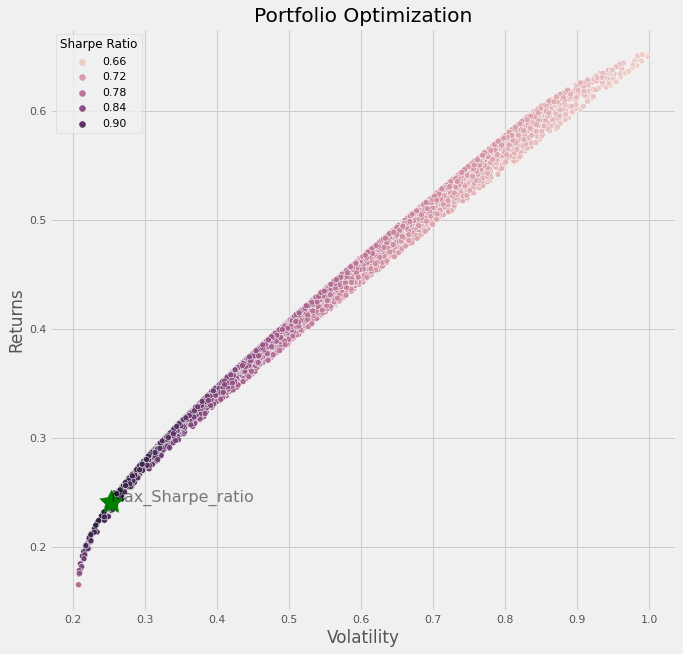

In [62]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
sns.set_context('notebook')
style.use('fivethirtyeight')
sns.set_palette('deep')

plt.figure(figsize = (10,10) )
sns.scatterplot(x='Volatility', y= 'Returns', data=sim_df, hue='Sharpe Ratio')
plt.title('Portfolio Optimization')

# Maximimum sharpe ratio
plt.text(highest_sharpe['Volatility'], highest_sharpe['Returns'], 'Max_Sharpe_ratio', alpha=0.5, size=16) 
plt.scatter(highest_sharpe['Volatility'], highest_sharpe['Returns'], marker=(5, 1, 0), color='g',  s=600) 


#plt.scatter()
plt.show()

If an investor were to choose a point that lies along the boundary formed by the simulations, the efficient frontier, they can say with certainty that for a given risk level they are maximizing their risk adjusted returns with the given portfolio. So in this case it comes down to the investors risk tolerance and what level of risk they are willing to accept. In the figure each point represents a run of our simulation and therefore it represents a portfolio with randomly assigned asset weightings, by plotting out all of the 10,000 runs we can then see the efficient frontier begin to form as the upper boundary or the maximum level of risk adjusted returns for the given volatility.

The efficient frontier gives insight into designing a diversified portfolio allowing an investor to avoid a portfolio with a volatilty of 0.5 and return of 0.38, a point below the efiicient frontier, and to instead have a portfolio with a 0.5 volatility and return of 0.42 maximizing their risk adjusted return. 


In [65]:
highest_sharpe

Returns                             0.241075
Volatility                          0.252688
Sharpe Ratio                         0.95404
BTC-ETH-SPY Weights    [0.154, 0.038, 0.808]
Name: 1094, dtype: object

In [71]:
print('The annual return when the Sharpe ratio is maximized is projected to be between: ' + str(highest_sharpe['Returns']-highest_sharpe['Volatility']) + ' and ' + str(highest_sharpe['Returns']+highest_sharpe['Volatility']) + ' with a 68% confidence interval. ')

The annual return when the Sharpe ratio is maximized is projected to be between: -0.011613559641221849 and 0.4937633276536347 with a 68% confidence interval. 


Sharpe ratio's greater than 1 are usually considered acceptable to investors, with a ratio of 3 considered as excellent and a ratio under 1 considered suboptimal. 

In this simulation most of the Sharpe ratios lay below 1, this is mainly due to the nature of the assets chosen for this analysis as cryptocurrencies are inherently volatile at this stage in the capital markets and as such causes the volatility term in the Sharpe ratio to be higher than what is seen in traditional financial assets. 

After this analysis we can conclude that a portfolio consisting of only BTC, ETH and SPY is not properly diversified and leaves the individual investor to be required to take on a high level of risk. 


If an investor wanted to maximize their returns over this time period and ignore their level of risk then the optimal strategy would have been a portfolio comprised mainly of Ethereum seeing as it has had the most growth over the time period of study here from 2015 onward with the rest of the portfolio's allocation weighted as seen below: 

In [66]:
highest_return

Returns                              0.65153
Volatility                          0.990493
Sharpe Ratio                        0.657783
BTC-ETH-SPY Weights    [0.064, 0.932, 0.005]
Name: 6379, dtype: object